# Iris Dataset

Import relevant python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here we get an idea of the number of instances and attributes of the data:

In [3]:
print(iris.shape)

(150, 5)


In [4]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


We can see from here that the targets are well-balanced and not skewed. This simplifies the classification problem and we will be able to use prediction accuracy as a good measure of the viability of any model used.

Below we include visualizations to help give a good overview of the data.

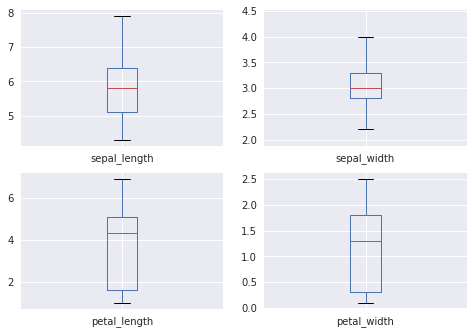

In [6]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False)
plt.show()

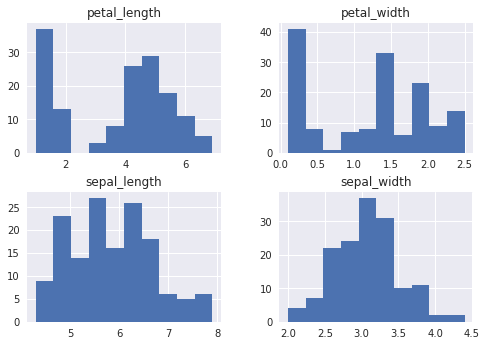

In [7]:
iris.hist()
plt.show()

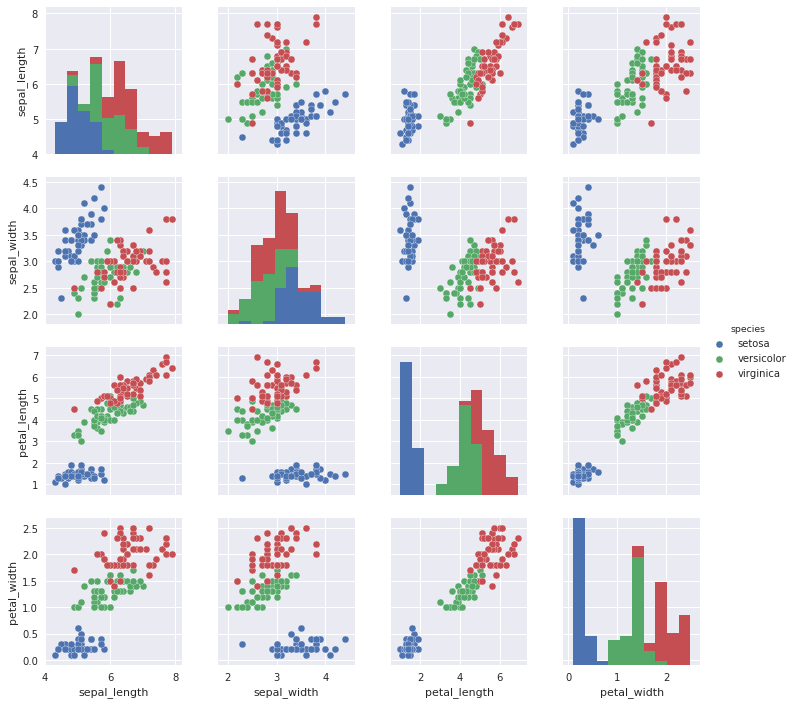

In [8]:
g = sns.pairplot(iris, hue="species")
plt.show()

It is clear that the setosa species is well separated from the other 2 species as a cluster in every pair of attributes (features). However the versicolor and virginica species are not as clearly separable. Visually we can identify petal_length and petal_width as the most effective pair of features in separating the three classes. However since the number of features is very small (4) we will proceed to use the entire dataset for the following analysis.

In [9]:
# convert data to matrix and list
X = iris.as_matrix(columns=iris.columns[:-1])
y_str = iris['species'].tolist()

# encode target as 
ile = preprocessing.LabelEncoder()
ile.fit(y_str)
y = ile.transform(y_str)

We then split the data into a training set and a validation set:

In [10]:
seed = 7
validation_size = 0.2
X_train, X_val, y_train,  y_val = model_selection.train_test_split(X, y, 
                                  test_size=validation_size, random_state=seed)

In [11]:
scoring = 'accuracy'

# introduce various algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# then evaluate each model
results = []
names = []

for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train,
                                                 cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.967308 (0.040078)
LDA: 0.974883 (0.038494)
KNN: 0.981667 (0.036856)
CART: 0.974883 (0.038494)
NB: 0.966550 (0.041087)
SVM: 0.991667 (0.025000)


It appears that the SVM has the best estimated accuracy score out of the different classifiers used. 

We can also visualise the evaluation results by using a box plot of the accuracy means and spreads. The spreads arise due to the k=10-fold cross-validation.

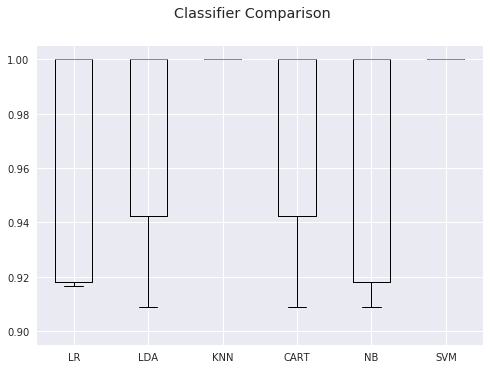

In [12]:
# comparing classifiers:
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We will then utilize the SVM classifier, as the most accurate of the models used, to make predictions on the validation set. This enables us to obtain an accurate grasp of the accuracy of our model on an 'unseen' dataset and check for overfitting.

In [13]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_val)
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       1.00      0.83      0.91        12
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



With an accuracy score of 0.933, the SVM has performed relatively well on the validation set. Class 0, the setosa species, is easily predicted with an f1-score of 1.00, while classes 1 and 2, the other 2 species, have a slightly lower f1-score. Such a resulted was foreseen when plotting the pairplots of the data, and identifying the setosa species as being well separated from the other 2 species.